In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,f1_score

In [3]:
#importing the data files from file folder
a1=pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/train_Df64byy.csv')
train=pd.DataFrame(a1)
a2=pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/test_YCcRUnU.csv')
test=pd.DataFrame(a2)

In [4]:
#overview of data format
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
#overview of test data format
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [6]:
#checking the shape of the dataset
print(train.shape)
print(test.shape)

(50882, 14)
(21805, 13)


In [7]:
#checking each feature for data insights
for col in train.columns:
  print(train[col].value_counts())

2047     1
21151    1
17053    1
19100    1
29339    1
        ..
23905    1
21856    1
44351    1
42302    1
2049     1
Name: ID, Length: 50882, dtype: int64
C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64
1       96
5       75
2       73
6       73
4       73
        ..
5548     1
5671     1
5639     1
5686     1
5524     1
Name: Region_Code, Length: 5316, dtype: int64
Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64
Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64
75    2982
23    1671
24    1652
25    1644
22    1563
26    1

In [8]:
#ratio of null values in train data
train.isnull().sum()/train.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [9]:
#ratio of null values in test data
test.isnull().sum()/test.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [10]:
#getting the description for each feature
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

AS we see the 'holding_policy_duration' seems to be numerical form but it shows as a object datatype.

In [11]:
#checking the holding_policy_duration feature for unique values
train['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [12]:
test['Holding_Policy_Duration'].unique()

array(['6.0', '3.0', '2.0', nan, '14+', '5.0', '1.0', '4.0', '12.0',
       '11.0', '7.0', '9.0', '13.0', '8.0', '14.0', '10.0'], dtype=object)

In [13]:
#replacing the object form of data to numeric
train['Holding_Policy_Duration'].replace('14+','14',inplace=True)
test['Holding_Policy_Duration'].replace('14+','14',inplace=True)

#converting the feature to numeric datatype
train['Holding_Policy_Duration']=pd.to_numeric(train['Holding_Policy_Duration'])
test['Holding_Policy_Duration']=pd.to_numeric(test['Holding_Policy_Duration'])

In [14]:
#applying imputation to adjust null values
train['Holding_Policy_Duration']=train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].mean())
train['Holding_Policy_Type']=train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mode()[0])
train['Health Indicator']=train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])

#Applying the same imputation to test data
test['Holding_Policy_Duration']=test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].mean())
test['Holding_Policy_Type']=test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mode()[0])
test['Health Indicator']=test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])


In [15]:
#checking again for null values
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [16]:
test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

## Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


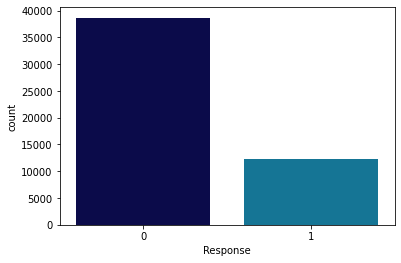

In [17]:
sns.countplot(train['Response'],palette='ocean')

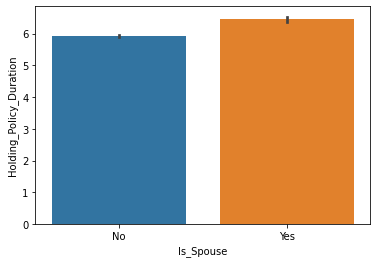

In [18]:
sns.barplot(x='Is_Spouse',y='Holding_Policy_Duration',data=train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


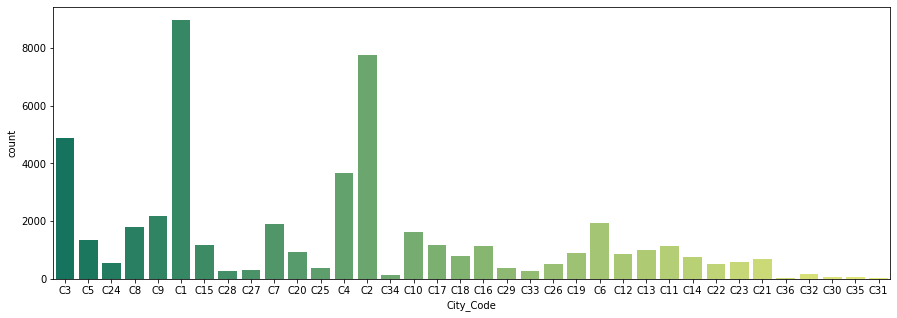

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(train['City_Code'],palette='summer')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


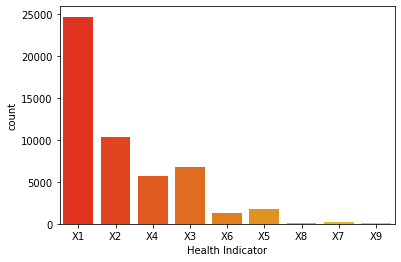

In [20]:
sns.countplot(train['Health Indicator'],palette='autumn')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


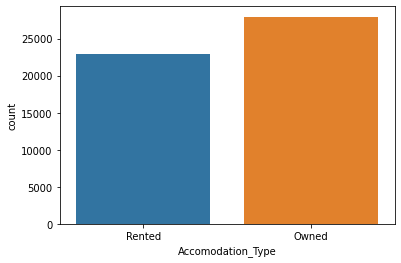

In [21]:
sns.countplot(train['Accomodation_Type'])

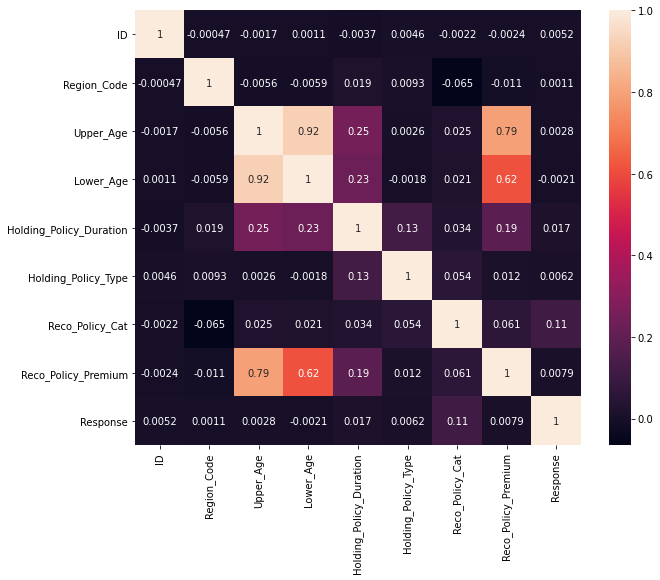

In [22]:
#plotting correlation using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True)

In [23]:
#importing label Encoder to convert categorical data to numerical form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in train.columns:
  if train[col].dtypes==object:
    train[col]=le.fit_transform(train[col].astype(str))

for col in test.columns:
  if test[col].dtypes==object:
    test[col]=le.fit_transform(test[col].astype(str))

In [24]:
#as ID column is complete unique and not adding any values to the dataset in prediction,we drop it
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

In [25]:
#statistical summary of train data
train.describe()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,14.974981,1732.788707,0.450670,0.203333,44.856275,42.738866,0.165520,1.112751,6.015246,2.662415,15.115188,14183.950069,0.239947
std,12.147432,1424.081652,0.497566,0.402482,17.310271,17.319375,0.371653,1.406159,3.492748,0.841994,6.340663,6590.074873,0.427055
min,0.000000,1.000000,0.000000,0.000000,18.000000,16.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2280.000000,0.000000
25%,4.000000,523.000000,0.000000,0.000000,28.000000,27.000000,0.000000,0.000000,4.000000,2.000000,12.000000,9248.000000,0.000000
50%,11.000000,1391.000000,0.000000,0.000000,44.000000,40.000000,0.000000,1.000000,6.015246,3.000000,17.000000,13178.000000,0.000000
75%,30.000000,2667.000000,1.000000,0.000000,59.000000,57.000000,0.000000,2.000000,6.015246,3.000000,20.000000,18096.000000,0.000000
max,35.000000,6194.000000,1.000000,1.000000,75.000000,75.000000,1.000000,8.000000,14.000000,4.000000,22.000000,43350.400000,1.000000


In [26]:
#statistical summary gives the info of outliers present in some of the feature
#importing zscore to remove some of outliers
from scipy.stats import zscore
z=np.abs(zscore(train))
train_new=train[(z<3).all(axis=1)]
train_new.shape

(50080, 13)

In [27]:
#Accepting modified datset as final for furthur processing
train=train_new

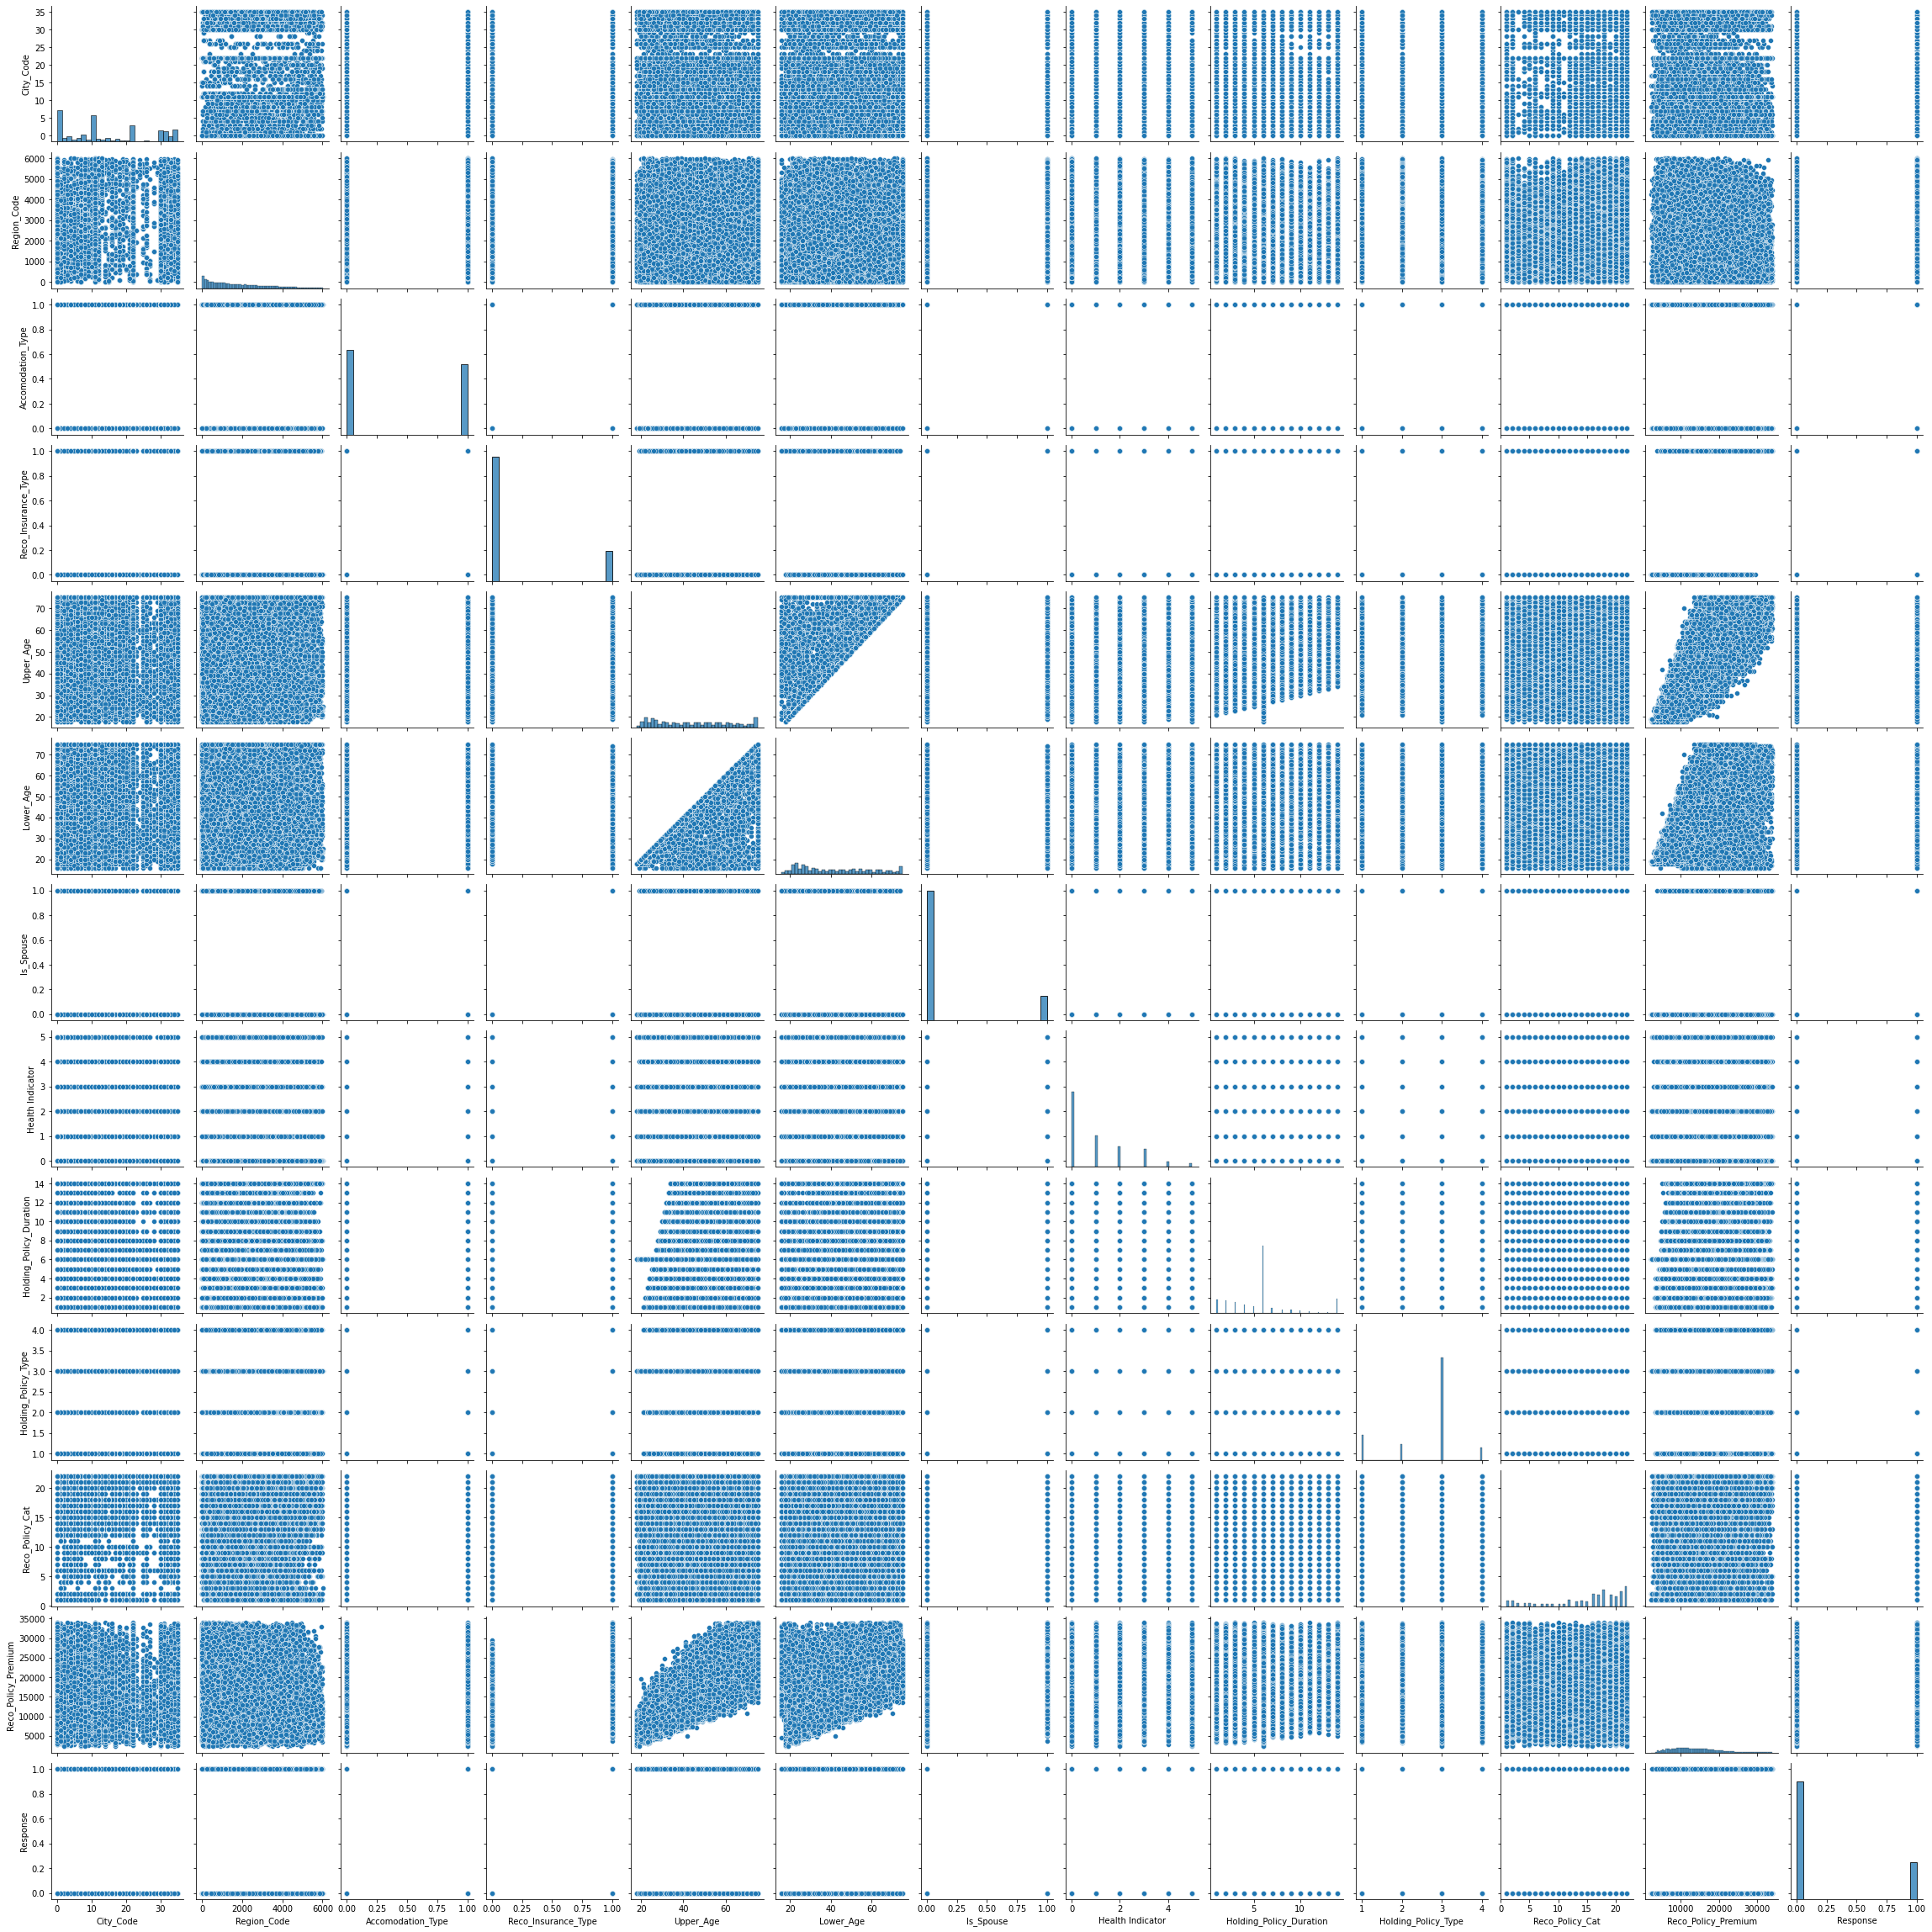

In [28]:
sns.pairplot(train)

In [29]:
train['Response'].value_counts()

0    38090
1    11990
Name: Response, dtype: int64

In [72]:
#splitting the independent and dependant value
x=train.iloc[:,0:-1]
y=train.iloc[:,-1]

## Performing Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

for col in x.columns:
    scaler = StandardScaler()
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))

In [74]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    76.06 %
1    23.94 %
Name: Response, dtype: object

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3)

In [77]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train_ns,y_train_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
y_pred=classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7422695116385212
              precision    recall  f1-score   support

           0       0.77      0.95      0.85     26711
           1       0.34      0.09      0.14      8345

    accuracy                           0.74     35056
   macro avg       0.56      0.52      0.50     35056
weighted avg       0.67      0.74      0.68     35056



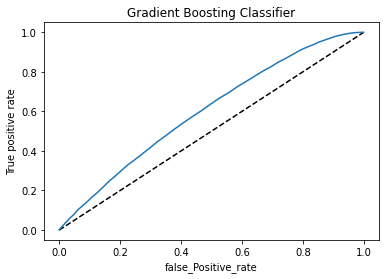

roc_auc_score= 0.518229084500523


In [80]:
y_pred_prob=classifier.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false_Positive_rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting Classifier')
plt.show()
roc_score=roc_auc_score(y_test,classifier.predict(x_test))
print('roc_auc_score=',roc_score)

In [81]:
submission = pd.read_csv('/content/drive/MyDrive/Analytics Vidhya/sample_submission_QrCyCoT.csv')
final_predictions = classifier.predict(test)
submission['Response'] = final_predictions

In [82]:
submission.to_csv('submit.csv',index=False)
!cp submit.csv "drive/My Drive/"